In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JUn3VuVCoOKC5Nv2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JlMP0YH6vhxWRMZz.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/y2auZRkrUIi0wvd2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Qx31hf6YWyFs6Mu7.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/2tDgPZGqbrw95j39.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/v1b7FBFD4ZbLJnhB.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/B3dlyiRDulDJWOsW.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Ht08RX3DQCSdl9Sy.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/vHbB53ZFtZoNcvAM.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/n5NXfZTRonR4iOr0.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/9v75qnx8zdeAAOq6.

/kaggle/input/rockpaperscissors/rps-cv-images/rock/9TeUwuSOgtGgewNL.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/M5FhZFlXsmRMTHkc.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/4ZVOE4DxJDxaysrR.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/N235Vnlue0M9SwaK.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/XqR9QAFi9qQMUdw2.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/BnnRzew7yA30gyts.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/9buKAwFejr8MhkAF.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/qrKttJhRuVwzKsQM.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/u3nAxX6ZNsAKQ7WC.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/9Xi2VuW7sti2BV2H.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/QSPgUc6QCA1kNLin.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/Tp8sMtigMXoyabfq.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/iaEybTdfnL0RoU9I.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/HTlhfHf6CMkGB

/kaggle/input/rockpaperscissors/scissors/GVxDgpt5p4FA2e6n.png
/kaggle/input/rockpaperscissors/scissors/iYOrHPwEvEe7rXSL.png
/kaggle/input/rockpaperscissors/scissors/9VLUR3WfMvIdEMrO.png
/kaggle/input/rockpaperscissors/scissors/8Gew5erdZ7A4K3gI.png
/kaggle/input/rockpaperscissors/scissors/iM1hcJsC387vy9YA.png
/kaggle/input/rockpaperscissors/scissors/otBEUIQNFGMk80vF.png
/kaggle/input/rockpaperscissors/scissors/RrbEWg7xTBv2qa9q.png
/kaggle/input/rockpaperscissors/scissors/Gr3EpS7AO3KtWTz0.png
/kaggle/input/rockpaperscissors/scissors/k7KXWWd1IymDhMIm.png
/kaggle/input/rockpaperscissors/scissors/ZCr3PjDcttbKRAAW.png
/kaggle/input/rockpaperscissors/scissors/2tRxoWcFfrvjsHTZ.png
/kaggle/input/rockpaperscissors/scissors/od9zrr7aF0p8VPRM.png
/kaggle/input/rockpaperscissors/scissors/Ea5uaRMj6JwEAEtn.png
/kaggle/input/rockpaperscissors/scissors/mRlkMzgNq3PxHHe4.png
/kaggle/input/rockpaperscissors/scissors/PObNJKVS6CGp8t2M.png
/kaggle/input/rockpaperscissors/scissors/uI2O1DwI1nIIx9Qu.png
/kaggle/

/kaggle/input/rockpaperscissors/rock/EvCwicQf5dVFto6x.png
/kaggle/input/rockpaperscissors/rock/19H63c0MWD56EWNq.png
/kaggle/input/rockpaperscissors/rock/EfKcpzUsdKq9J3VN.png
/kaggle/input/rockpaperscissors/rock/UMhiPBxOmfSpItMU.png
/kaggle/input/rockpaperscissors/rock/rzLjaOMLU7vbZnPH.png
/kaggle/input/rockpaperscissors/rock/o3gQiGh46MjCJtVK.png
/kaggle/input/rockpaperscissors/rock/iCLIvwweBESAwx4z.png
/kaggle/input/rockpaperscissors/rock/r0xQoW6iQbPig3jf.png
/kaggle/input/rockpaperscissors/rock/8CjXmw1rSkNLaj6p.png
/kaggle/input/rockpaperscissors/rock/INutMuoFBgugllQm.png
/kaggle/input/rockpaperscissors/rock/7wFK6yhjKaNkhwZs.png
/kaggle/input/rockpaperscissors/rock/y6SQqRL9aPExUa7f.png
/kaggle/input/rockpaperscissors/rock/bu8W5hPRULeRi0Kr.png


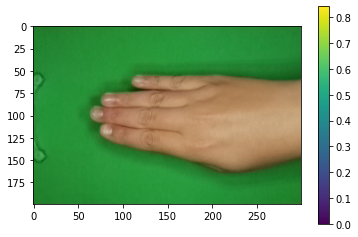

(200, 300, 3)

In [51]:
img_path = "/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png"
img = mpimg.imread(img_path)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

img.shape

In [135]:
data_dir = "/kaggle/input/rockpaperscissors/rps-cv-images/"

batch_size = 32
img_height = 200
img_width = 300

# TODO: Split dataset in 3! parts

print("Train:")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Validation:")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Train:
Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Validation:
Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [53]:
class_names = train_ds.class_names
class_length = len(class_names)

print(class_names)
print(class_length)

['paper', 'rock', 'scissors']
3


In [18]:
# Tunen

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [136]:
# Stand
# only testing purpose - doesn't change anything 🙃
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

img_img, img_labels = next(iter(train_ds))
f_img = img_img[0]
print(np.min(f_img), np.max(f_img))

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

labels = []
img_img = iter(val_ds)
for x in iter(val_ds):
    image_batch, labels_batch = x
    l = labels_batch.numpy()
    labels.extend(l)
print(labels)

0.0 228.0
[2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1,

In [55]:
# define model

num_classes = class_length

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 37, 64)       

In [56]:
# our model

epochs=7

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
55/55 [==============================] - 67s 1s/step - loss: 0.8795 - accuracy: 0.6722 - val_loss: 0.4779 - val_accuracy: 0.7986
Epoch 2/10
55/55 [==============================] - 76s 1s/step - loss: 0.2958 - accuracy: 0.8881 - val_loss: 0.1590 - val_accuracy: 0.9565
Epoch 3/10
55/55 [==============================] - 67s 1s/step - loss: 0.1359 - accuracy: 0.9486 - val_loss: 0.1097 - val_accuracy: 0.9611
Epoch 4/10
55/55 [==============================] - 66s 1s/step - loss: 0.0664 - accuracy: 0.9772 - val_loss: 0.0830 - val_accuracy: 0.9725
Epoch 5/10
55/55 [==============================] - 65s 1s/step - loss: 0.0341 - accuracy: 0.9914 - val_loss: 0.0888 - val_accuracy: 0.9703
Epoch 6/10
55/55 [==============================] - 66s 1s/step - loss: 0.0356 - accuracy: 0.9880 - val_loss: 0.1259 - val_accuracy: 0.9748
Epoch 7/10
55/55 [==============================] - 66s 1s/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.0997 - val_accuracy: 0.9748
Epoch 8/10
55/55 [==

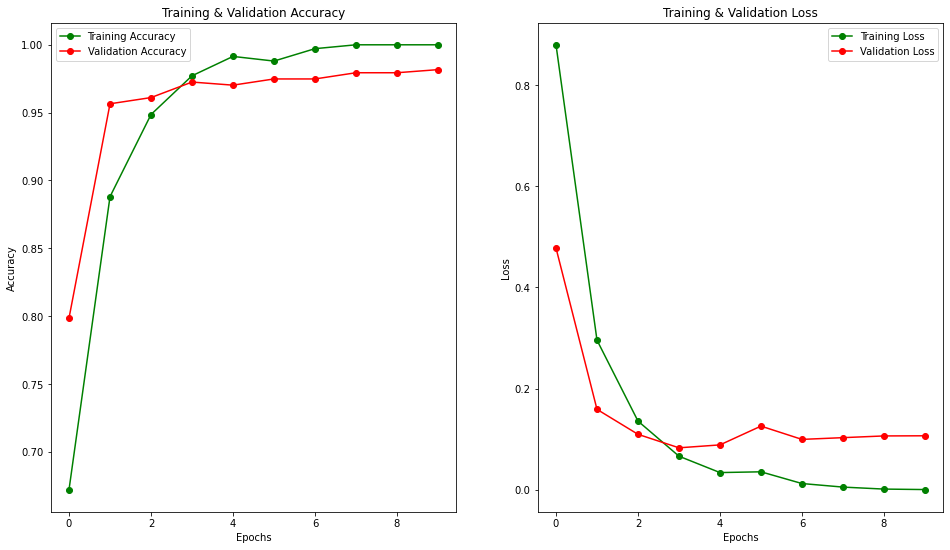

In [60]:
# validate

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [127]:
predictions = model.predict_classes(val_ds)
predictions[:5]
print(len(predictions))
print(len(labels))

437
0


In [114]:
print(classification_report(labels, predictions, target_names = class_names))

              precision    recall  f1-score   support

       paper       0.33      0.33      0.33       139
        rock       0.37      0.37      0.37       158
    scissors       0.28      0.29      0.28       140

    accuracy                           0.33       437
   macro avg       0.33      0.33      0.33       437
weighted avg       0.33      0.33      0.33       437



In [137]:
print(labels)
print(predictions)
cm = confusion_matrix(labels,predictions)
print(cm)

[2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 

In [118]:
cm = pd.DataFrame(cm , index = [i for i in range(3)] , columns = [i for i in range(3)])
print(cm)

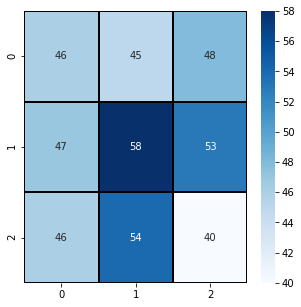

In [130]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')